#  AQI Project

In [864]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [865]:
df= pd.read_csv(r'C:\Users\egoeshu\Desktop\testingdoc\AQI_ML\AQI-Project-master\Data\Real-Data\Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [866]:
df.shape

(1093, 9)

### Feature Engineering

In [867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


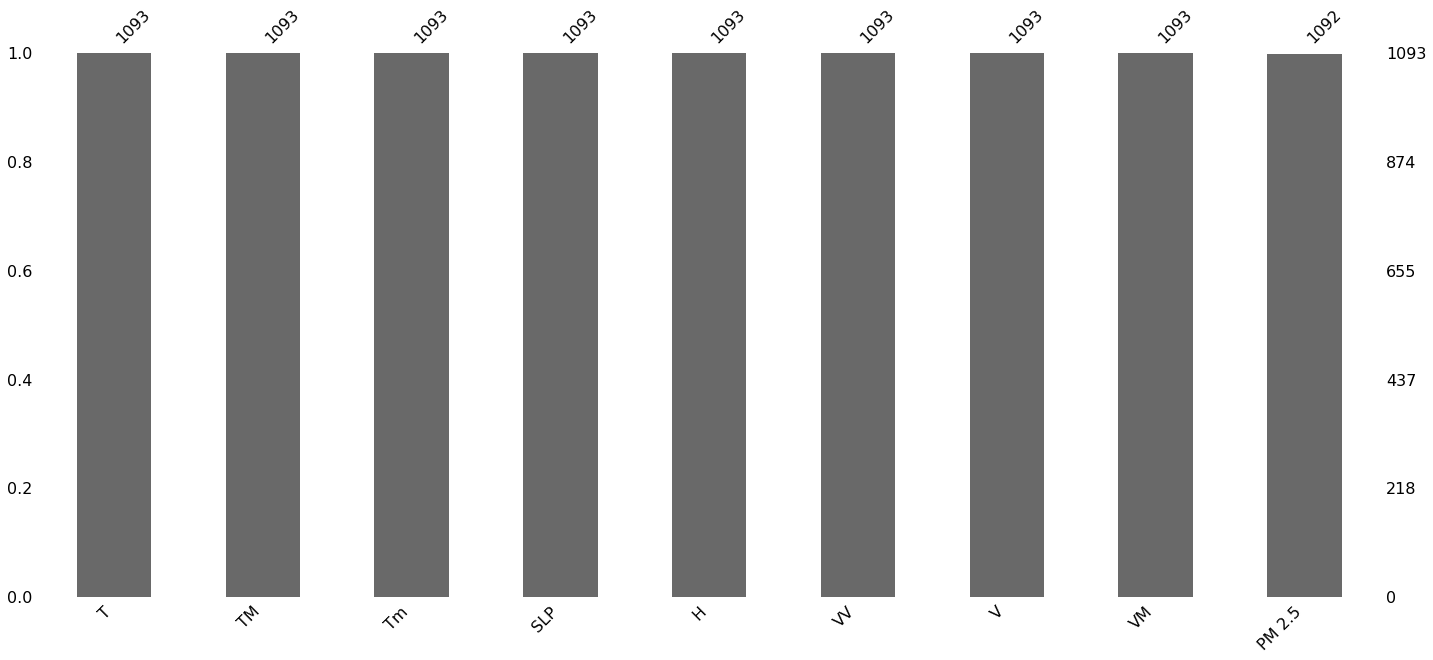

In [868]:
# checking null values

import missingno as ms

ms.bar(df)

In [869]:
df.isnull().sum() # only 1 null value in target

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

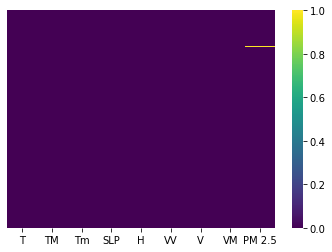

In [870]:
# Null value checking by heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')


In [871]:
# Dropping null values

df= df.dropna()
df.isnull().sum() # now no null value

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [872]:
# splitting independent and dependent feature

X= df.iloc[:,:-1] # independent feature
y= df.iloc[:,-1] # dependent feature

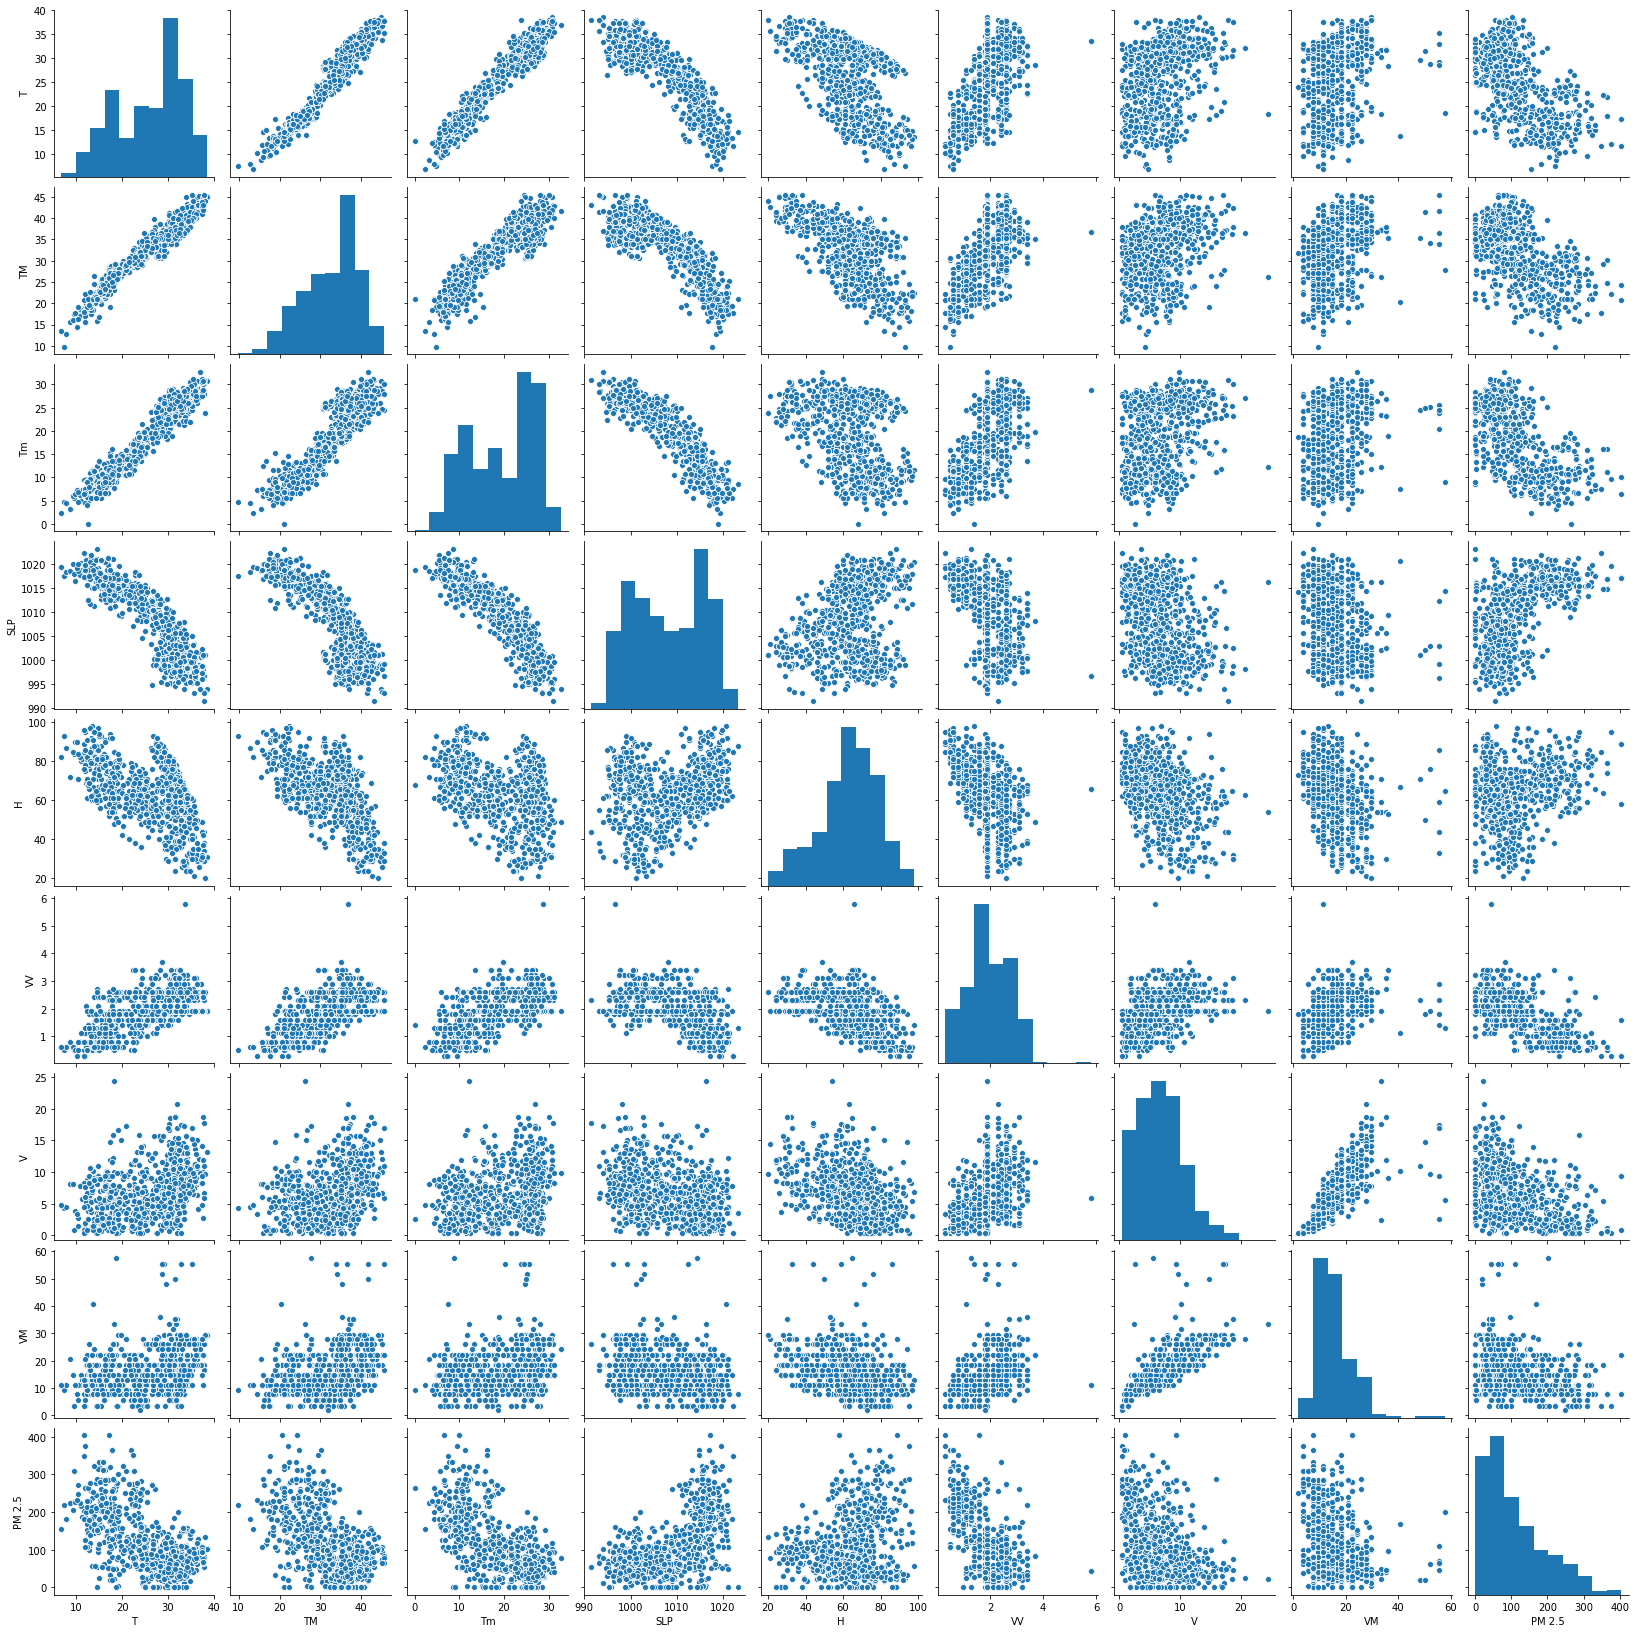

In [873]:
sns.pairplot(df)

In [874]:
# Above we can see there are correlation happening
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


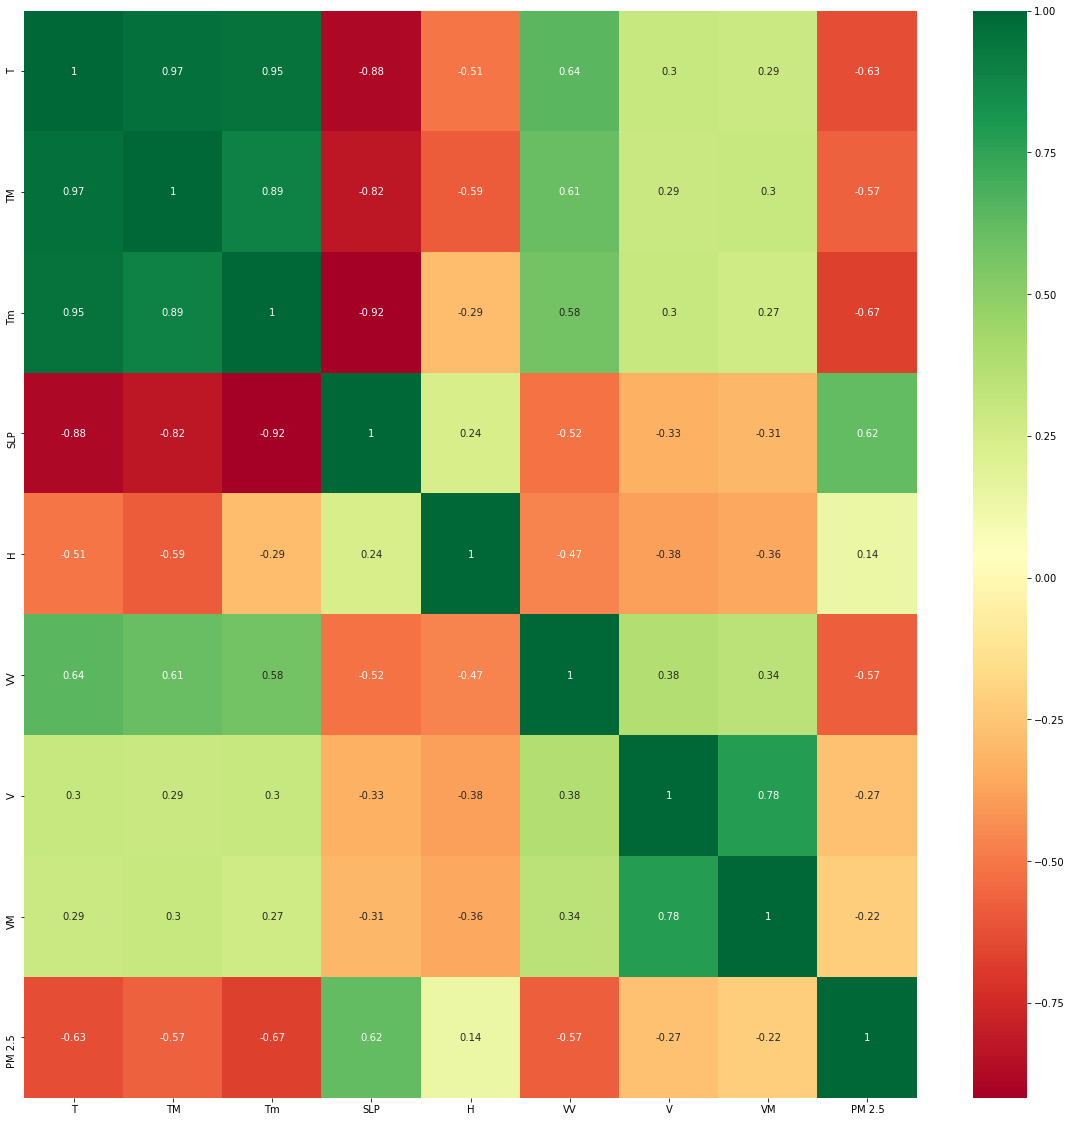

In [875]:
# Making heatmap of correlation

cormat= df.corr()
top_corr_feature= cormat.index

plt.figure(figsize= (20,20))

# g= sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap= 'RdYlGn')
g= sns.heatmap(df.corr(), annot=True, cmap= 'RdYlGn')


In [876]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [877]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,T,860.618775
1,TM,505.473640
2,Tm,254.113295
3,SLP,334.004606
4,H,73.359657
5,VV,15.683848
6,V,11.814130
7,VM,14.604543


### Feature importance

In [878]:
# Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [879]:
print(model.feature_importances_) # getting value with their values

[0.18324241 0.0914278  0.18657758 0.1752982  0.08341957 0.1872249
 0.05117074 0.04163882]


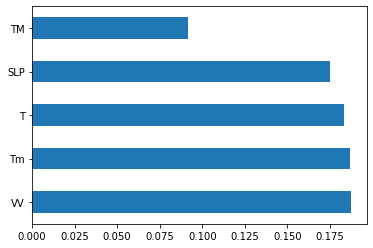

In [880]:
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Feature scaling

In [881]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [882]:
['Average_temp', 'Maximum_temp', 'Minimum_temp',  'Pressure_sea_level', 'Average_humidity', 'Average_visibilty', 'Average_wind_speed', 'Max_wind_speed']

['Average_temp',
 'Maximum_temp',
 'Minimum_temp',
 'Pressure_sea_level',
 'Average_humidity',
 'Average_visibilty',
 'Average_wind_speed',
 'Max_wind_speed']

In [883]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

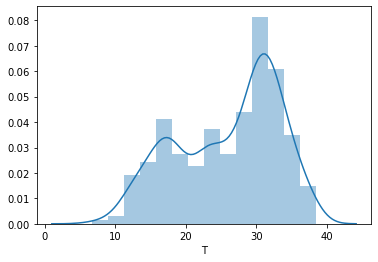

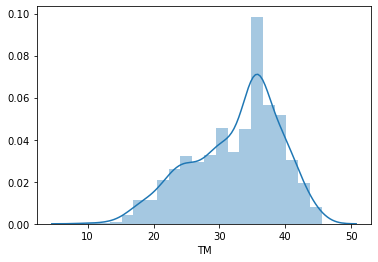

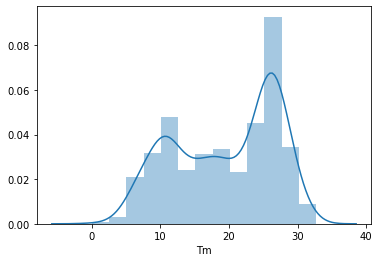

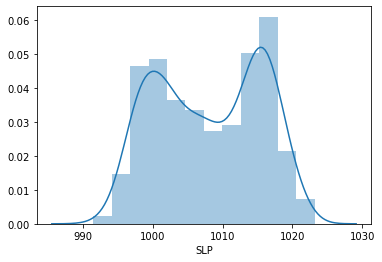

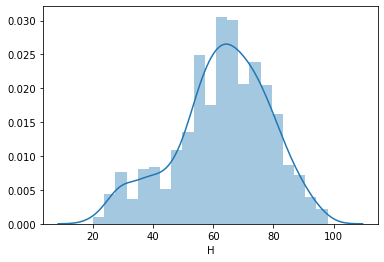

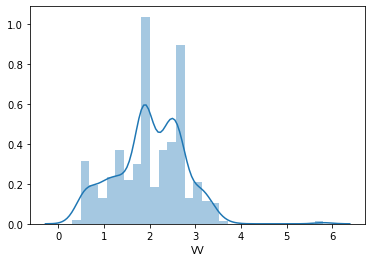

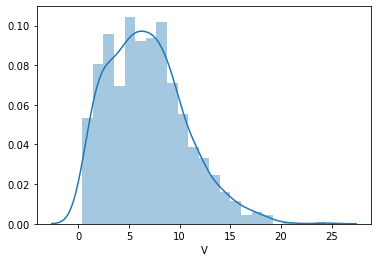

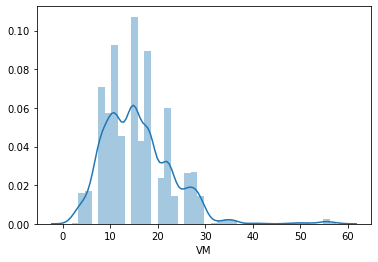

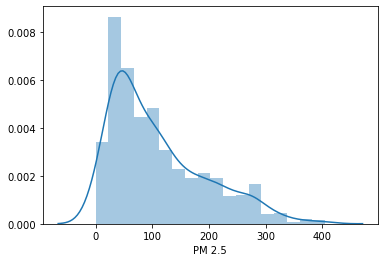

In [884]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [946]:
df_temp = df.copy()

In [947]:
df_temp.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [948]:
# Deleting multicollinearity

df_temp= df_temp.drop(['TM', 'Tm'], axis=1)

In [949]:
df_temp.head()

,T,SLP,H,VV,V,VM,PM 2.5
0,7.4,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [950]:
X= df_temp.iloc[:,:-1]
y= df_temp.iloc[:,-1]

In [951]:
X.head()

,T,SLP,H,VV,V,VM
0,7.4,1017.6,93.0,0.5,4.3,9.4
1,7.8,1018.5,87.0,0.6,4.4,11.1
2,6.7,1019.4,82.0,0.6,4.8,11.1
3,8.6,1018.7,72.0,0.8,8.1,20.6
4,12.4,1017.3,61.0,1.3,8.7,22.2


In [952]:
[7.4, 1017.6, 93.0, 0.5, 4.3, 9.4]

[7.4, 1017.6, 93.0, 0.5, 4.3, 9.4]

In [953]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

In [954]:
y= pd.DataFrame(y, columns=['PM 2.5'])

y.head()

,PM 2.5
0,219.720833
1,182.187500
2,154.037500
3,223.208333
4,200.645833


### Feature Transformation

In [955]:
from scipy.special import boxcox, inv_boxcox

In [956]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

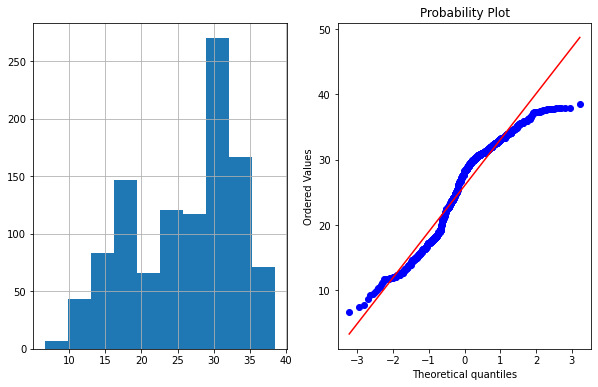

In [957]:
plot_data(X,'T')

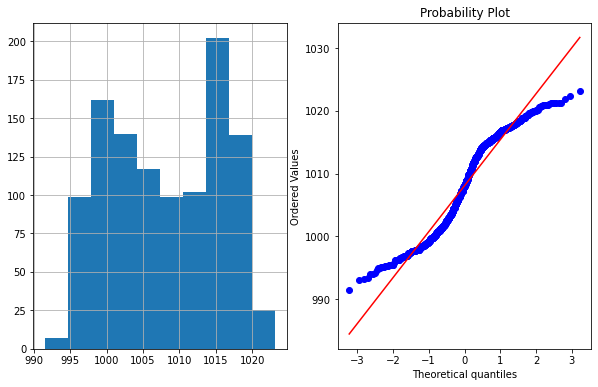

In [958]:
plot_data(X,'SLP')

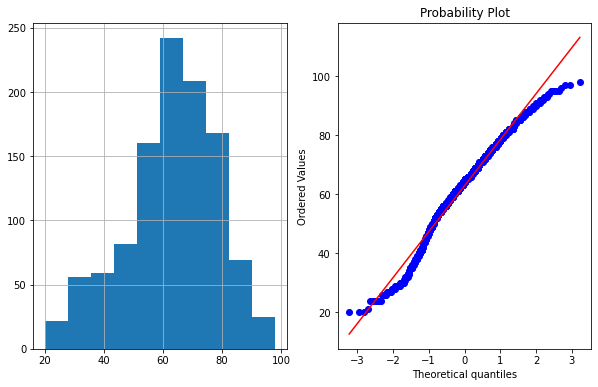

In [959]:
plot_data(X,'H')

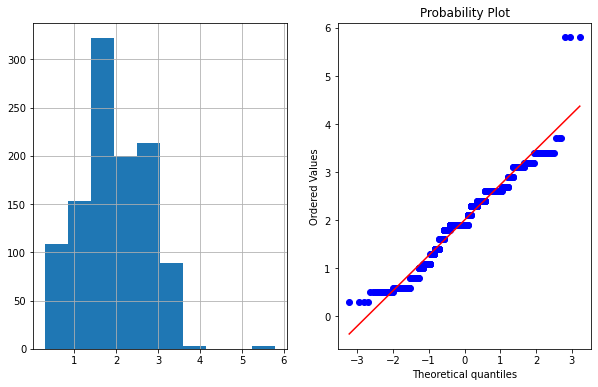

In [960]:
plot_data(X,'VV')

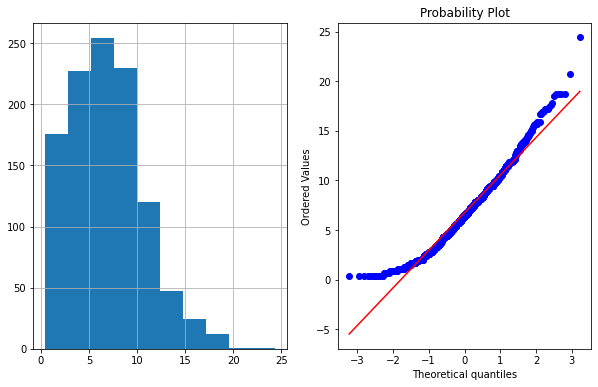

In [961]:
plot_data(X,'V')

0.5328952122597116


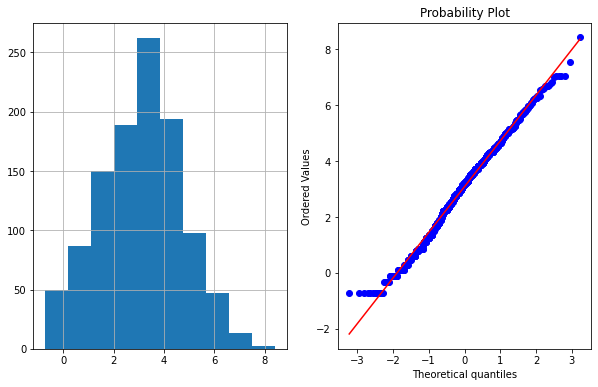

In [962]:
X['V_Boxcox'],parameter1=stat.boxcox(X['V'])
print(parameter1)
plot_data(X,'V_Boxcox')

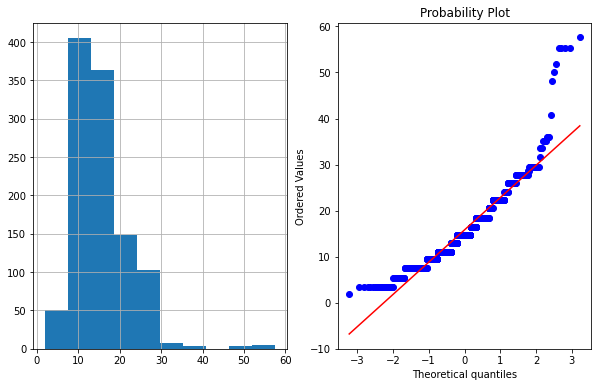

In [963]:
plot_data(X,'VM')

0.30356123185063394


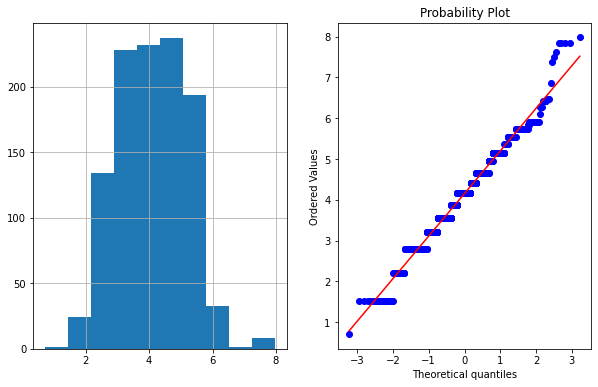

In [964]:
X['VM_Boxcox'],parameter2=stat.boxcox(X['VM'])
print(parameter2)
plot_data(X,'VM_Boxcox')

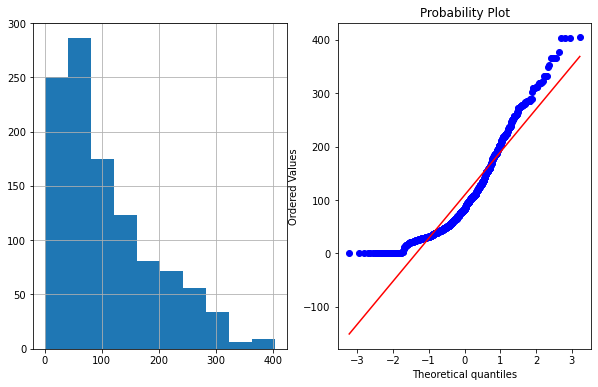

In [965]:
plot_data(y,'PM 2.5')

0.4090025484101311


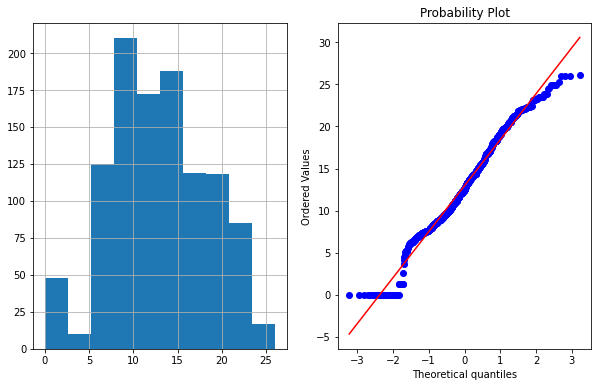

In [966]:
y['PM 2.5_Boxcox'],parameter3=stat.boxcox(y['PM 2.5']+1)
print(parameter3)
plot_data(y,'PM 2.5_Boxcox')

In [967]:
X.head()

,T,SLP,H,VV,V,VM,V_Boxcox,VM_Boxcox
0,7.4,1017.6,93.0,0.5,4.3,9.4,2.205999,3.209428
1,7.8,1018.5,87.0,0.6,4.4,11.1,2.256322,3.546041
2,6.7,1019.4,82.0,0.6,4.8,11.1,2.452466,3.546041
3,8.6,1018.7,72.0,0.8,8.1,20.6,3.844637,4.958411
4,12.4,1017.3,61.0,1.3,8.7,22.2,4.066702,5.147945


In [968]:
X= X.drop(['V', 'VM'], axis=1)

In [969]:
X.head()

,T,SLP,H,VV,V_Boxcox,VM_Boxcox
0,7.4,1017.6,93.0,0.5,2.205999,3.209428
1,7.8,1018.5,87.0,0.6,2.256322,3.546041
2,6.7,1019.4,82.0,0.6,2.452466,3.546041
3,8.6,1018.7,72.0,0.8,3.844637,4.958411
4,12.4,1017.3,61.0,1.3,4.066702,5.147945


In [970]:
y.head()

,PM 2.5,PM 2.5_Boxcox
0,219.720833,19.783616
1,182.187500,18.152036
2,154.037500,16.793394
3,223.208333,19.926602
4,200.645833,18.976872


In [971]:
y= y.drop(['PM 2.5'], axis=1)

In [972]:
y.head()

,PM 2.5_Boxcox
0,19.783616
1,18.152036
2,16.793394
3,19.926602
4,18.976872


### Feature Scaling

In [973]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_scaler= MinMaxScaler()
min_scaler.fit(X)
df_scalar= min_scaler.transform(X)
d= pd.DataFrame(data=df_scalar, columns=X.columns)
d

,T,SLP,H,VV,V_Boxcox,VM_Boxcox
0,0.022013,0.823344,0.935897,0.036364,0.320499,0.343845
1,0.034591,0.851735,0.858974,0.054545,0.326002,0.390128
2,0.000000,0.880126,0.794872,0.054545,0.347450,0.390128
3,0.059748,0.858044,0.666667,0.090909,0.499684,0.584322
4,0.179245,0.813880,0.525641,0.181818,0.523967,0.610382
...,...,...,...,...,...,...
1087,0.358491,0.753943,0.461538,0.272727,0.770254,0.665989
1088,0.349057,0.766562,0.435897,0.363636,0.551328,0.610382
1089,0.226415,0.741325,0.961538,0.054545,0.523967,0.475954
1090,0.301887,0.801262,0.743590,0.145455,0.470266,0.510396


In [974]:
standard_scaler= StandardScaler()
standard_scaler.fit(X)
df_standard= standard_scaler.transform(X)

# print(df_standard)
d1= pd.DataFrame(data=df_standard, columns=X.columns)
d1

,T,SLP,H,VV,V_Boxcox,VM_Boxcox
0,-2.575833,1.267245,1.919267,-2.011501,-0.536743,-0.899200
1,-2.520499,1.386928,1.536779,-1.877711,-0.505969,-0.579033
2,-2.672669,1.506612,1.218040,-1.877711,-0.386020,-0.579033
3,-2.409829,1.413525,0.580561,-1.610132,0.465336,0.764328
4,-1.884147,1.227351,-0.120666,-0.941183,0.601136,0.944601
...,...,...,...,...,...,...
1087,-1.095625,0.974686,-0.439405,-0.272235,1.978480,1.329274
1088,-1.137127,1.027879,-0.566901,0.396713,0.754152,0.944601
1089,-1.676642,0.921493,2.046763,-1.877711,0.601136,0.014682
1090,-1.344632,1.174158,0.963048,-1.208763,0.300815,0.252936


In [975]:
file = open('standardscalar.pkl', 'wb')

# dump information to that file
pickle.dump(standard_scaler, file)

In [976]:
standard_scale_y= StandardScaler()
standard_scale_y.fit(y)
df_standard= standard_scale_y.transform(y)

df_standard

array([[1.24141361],
       [0.94454279],
       [0.69733383],
       ...,
       [0.83175555],
       [0.97659407],
       [0.97280314]])

In [977]:
standard_scale_y= StandardScaler()
standard_scale_y.fit(y)
df_standard= standard_scale_y.transform(y)

# print(df_standard)
d2= pd.DataFrame(data=df_standard, columns=y.columns)
d2

,PM 2.5_Boxcox
0,1.241414
1,0.944543
2,0.697334
3,1.267430
4,1.094624
...,...
1087,1.715442
1088,1.506853
1089,0.831756
1090,0.976594


In [24]:
import scipy.stats as stat
import pylab

### Model Selection

In [754]:
# X= Final_data.iloc[:,:-1]
# y= Final_data.iloc[:,-1]


X= d1
y= pd.Series(d2.iloc[:,0])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(764, 6)
(328, 6)
(764,)
(328,)


#### KNN Regressor

In [755]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knn_object= KNeighborsRegressor()
knn_object.fit(X_train, y_train)

prediction= knn_object.predict(X_test)

print(metrics.r2_score(y_test, prediction))

0.6554258107298052


In [756]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.4355742616282088
MSE: 0.34062982565952693
RMSE: 0.5836350106526569


#### Linear Regression

In [757]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_)
print(lr.coef_)

-0.0031994252774489827
[-0.55910732 -0.02801506 -0.39669093 -0.32288391 -0.21827985  0.11524207]


In [758]:
pred= lr.predict(X_test)


print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(X_train, y_train))) # r2 closer to 1 means best fit line
print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.46533259388153486
Coefficient of determination R^2 <-- on train set: 0.48852053812637186


In [759]:
coeff_df = pd.DataFrame(lr.coef_ ,columns=['Coefficient'])
coeff_df

,Coefficient
0,-0.559107
1,-0.028015
2,-0.396691
3,-0.322884
4,-0.218280
5,0.115242


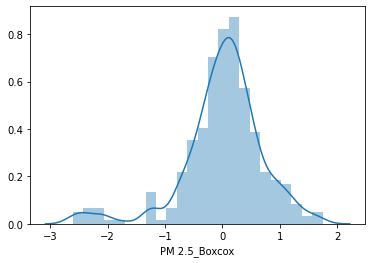

In [760]:
sns.distplot(y_test- pred) # residual are showing somewhat normal distribution kind of graph

Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
2. Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5. and so on

In [761]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4971450686837124
MSE: 0.5056245225315629
RMSE: 0.7110727969283896


In [762]:
# Using cross validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
score.mean()

0.42582964478802265

### Ridge Regression

In [763]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [764]:
r= Ridge()
r.fit(X_train, y_train)
print(r.coef_)

[-0.55123679 -0.0215294  -0.39338844 -0.32309695 -0.21629192  0.1145134 ]


In [765]:
ridge_object= Ridge()
ridge_mse=cross_val_score(ridge_object,X,y,cv=5)
print(ridge_mse.mean()) # very little bit better than linear

0.42589180621089556


In [766]:
# Now apply hypertuning on this

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40, 50,70]}
ridge_regressor=GridSearchCV(ridge_object,parameters,cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [767]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) # r2 score

{'alpha': 5}
0.4260285109766954


### Lasso Regression

In [768]:
from sklearn.linear_model import Lasso

lasso_object= Lasso()

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40, 50,70]}
lasso_regressor=GridSearchCV(lasso_object,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [770]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_) # Not changed by hyper tuning

{'alpha': 0.01}
-0.5639461416511489


In [771]:
pred= lasso_regressor.predict(X_test)

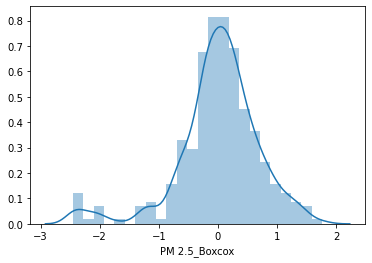

In [772]:
sns.distplot(a- pred) # residual are showing somewhat normal distribution kind of graph

In [773]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred)) # MSE is reduced
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4931558280953186
MSE: 0.48864752123387545
RMSE: 0.6990332761992633


### Decision Tree

In [774]:
from sklearn.tree import DecisionTreeRegressor

dtree= DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [775]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999999999064532


In [776]:
# We are seeing purely overfitting condition here
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7013496194572015


In [777]:
# Performing Hyper parameter tuning

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [778]:
# Using Randomised to find parameters faster

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

random_object=RandomizedSearchCV(dtree, param_distributions=params,n_jobs= -1,cv= 5,verbose=0, n_iter=20)

random_object.fit(X_train, y_train)

print(random_object.best_params_) # giving best parameter
print(random_object.best_score_) # best NMSE on these parameters

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 3, 'max_leaf_nodes': 60, 'max_features': 'auto', 'max_depth': 5}
0.4653978348316792


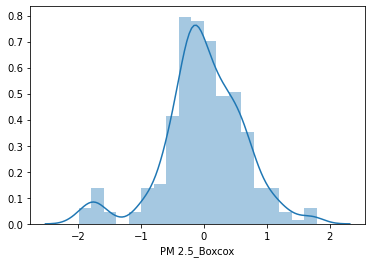

In [779]:
pred= random_object.predict(X_test)

sns.distplot(y_test-pred) # showing bell curved

In [780]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.47673690650473005
MSE: 0.4153455450788995
RMSE: 0.6444730755267434


### Random Forest

In [781]:
from sklearn.ensemble import RandomForestRegressor

rf_object= RandomForestRegressor(random_state=0)
rf_object.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [782]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_object.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9641237961504613


In [783]:
print("Coefficient of determination R^2 <-- on test set: {}".format(rf_object.score(X_test, y_test))) # R2 value

Coefficient of determination R^2 <-- on test set: 0.8620254270241179


In [784]:
# Using cross validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_object,X,y,cv=5)
score.mean()

0.6908129176851803

In [785]:
pred= rf_object.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2495831860782628
MSE: 0.13639516888297495
RMSE: 0.3693171657031053


In [786]:
print(metrics.r2_score(y_test, pred)) # It worked best in all of model

0.8620254270241179


In [787]:
# Applying Hyper parameter in Random Forest

param_grids= {'n_estimators': [i for i in range(100,500,100)], 'max_depth': [5,10, None], 'max_features': ['auto', 'sqrt', 'log2']}

# print(param_grids)
rf_object= RandomForestRegressor(random_state=0)
rf_random = RandomizedSearchCV(estimator = rf_object, param_distributions = param_grids , n_iter = 10, cv = 5, verbose=0, random_state=42, n_jobs = 1)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [788]:
rf_random.best_params_

{'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None}

In [793]:
pred= rf_random.predict(X_test)

print(metrics.r2_score(y_test, pred))  # best score achieved till now

0.8665006588583936


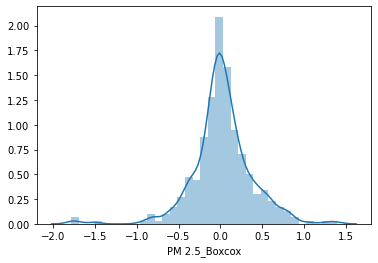

In [794]:
import seaborn as sns

sns.distplot(y_test- pred) # Residuals

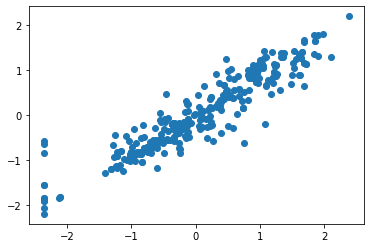

In [795]:
plt.scatter(y_test,pred)

In [796]:
# Errors reduced so much in R.F

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 0.24715819649148407
MSE: 0.13197116532448455
RMSE: 0.36327835790820867


In [797]:
# Saving the object file

file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

### XGBoost

In [798]:
import xgboost

xgb_object=xgboost.XGBRegressor()
xgb_object.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [799]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_object.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9992126795183746


In [800]:
print("Coefficient of determination R^2 <-- on test set: {}".format(xgb_object.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.8287003144614276


In [801]:
pred= xgb_object.predict(X_test)

print(metrics.r2_score(y_test, pred))

0.8287003144614276


In [802]:
# Applying Hyper parameter tuning


from sklearn.model_selection import RandomizedSearchCV

params= {
    'learning_rate': [0.05,0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

xgb_object= xgboost.XGBRegressor()

xgb_random= RandomizedSearchCV(estimator = xgb_object, param_distributions = params, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          verbosity=None),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0

In [803]:
xgb_random.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [804]:
xgb_random.best_score_ # Best o/p it has given

0.7113098487229156

In [805]:
pred= xgb_random.predict(X_test)

print(metrics.r2_score(y_test, pred))

0.8586117948897565


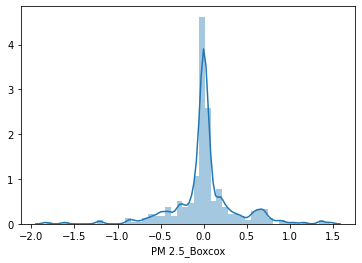

In [806]:
sns.distplot(y_test-pred) # can see residual is very less

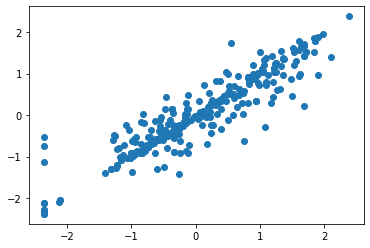

In [807]:
plt.scatter(y_test, pred)

In [808]:
# XGboost has given very less error as compared to R.F

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2219707027698382
MSE: 0.13976972494376427
RMSE: 0.3738578940503521


In [809]:
file = open('XGBregressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_random, file)

### Testing on Real world

In [1038]:
sd= pickle.load(open('standardscalar.pkl', 'rb'))
q= pickle.load(open('standardscalar_y.pkl', 'rb'))
ro = pickle.load(open('random_forest_regression_model.pkl', 'rb'))


import numpy as np

a= [7.4, 1017.6, 93.0, 0.5, 4.3, 9.4]

a=np.array([a])

a[:,4]= boxcox([a[:,4][0]], parameter1)

a[:,5]= boxcox([a[:,5][0]], parameter2)

b= sd.transform(a)


#Prediction
c= ro.predict(b)
z= q.inverse_transform(c)

print(inv_boxcox(z, parameter3))

[201.01694539]
